In [21]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [32]:
n_task_per_file = 50
n_files = 10
base_dir = "noise_sd=1/vary_r_noisesd_1.0_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [33]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [34]:
coverage_df

,5.00,10.00,20.00,0.05,0.10,0.20
0,0.857143,1.000000,1.000000,1.000000,1.000000,0.500000
1,1.000000,1.000000,1.000000,1.000000,0.166667,0.333333
2,0.500000,1.000000,1.000000,0.857143,1.000000,1.000000
3,1.000000,1.000000,0.833333,0.714286,1.000000,0.571429
4,0.600000,1.000000,0.400000,1.000000,0.600000,1.000000
...,...,...,...,...,...,...
45,0.166667,0.833333,1.000000,0.833333,1.000000,1.000000
46,0.666667,0.666667,0.833333,0.857143,1.000000,0.333333
47,0.500000,0.833333,1.000000,0.833333,1.000000,1.000000
48,1.000000,1.000000,0.857143,1.000000,1.000000,0.666667


In [35]:
length_df

,5.00,10.00,20.00,0.05,0.10,0.20
0,13.668291,13.615946,12.672111,14.756244,13.997423,13.963811
1,11.135724,10.506185,9.385791,11.475126,11.003700,11.193920
2,10.871804,10.139141,9.379892,11.482549,11.335310,11.133527
3,12.637723,12.316541,12.188791,12.848261,13.154432,12.757012
4,10.966903,10.483759,9.546454,11.892129,11.212756,12.129978
...,...,...,...,...,...,...
45,13.038034,13.150614,11.904399,13.062526,13.666704,13.751590
46,12.779924,11.976614,10.777849,13.801771,13.634243,13.295812
47,12.832665,12.886800,11.104344,13.125641,13.087183,13.292994
48,13.035042,12.745982,11.515688,13.500504,13.353162,13.338462


In [36]:
MSE_df

,5.00,10.00,20.00,0.05,0.10,0.20
0,5.099341,4.470659,4.749366,4.519107,4.790274,4.612161
1,4.594842,4.454604,4.272533,4.539768,4.605258,4.455933
2,4.720261,4.637741,4.602204,4.411590,4.693325,4.835533
3,5.251753,5.052439,4.917542,4.893801,4.672628,5.297046
4,3.949075,4.111491,4.008867,4.360243,4.257752,4.452203
...,...,...,...,...,...,...
45,4.176868,4.364989,4.338360,4.551324,4.492494,4.237009
46,4.246645,3.893309,3.935382,4.093408,4.588586,4.422390
47,4.496030,4.541523,4.279394,4.491382,4.771425,4.758142
48,4.809643,4.160210,4.133114,4.603542,4.506055,4.527654


In [37]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,10)
        elif metric == "MSE":
            axes[i].set_ylim(0,10)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 5.00     0.889200
10.00    0.889457
20.00    0.881095
0.05     0.897219
0.10     0.902714
0.20     0.886371
dtype: float64
Length :
 5.00     12.916215
10.00    12.294126
20.00    11.194095
0.05     13.315405
0.10     13.293124
0.20     13.265349
dtype: float64
MSE :
 5.00     4.716243
10.00    4.704293
20.00    4.726894
0.05     4.694518
0.10     4.704464
0.20     4.716420
dtype: float64


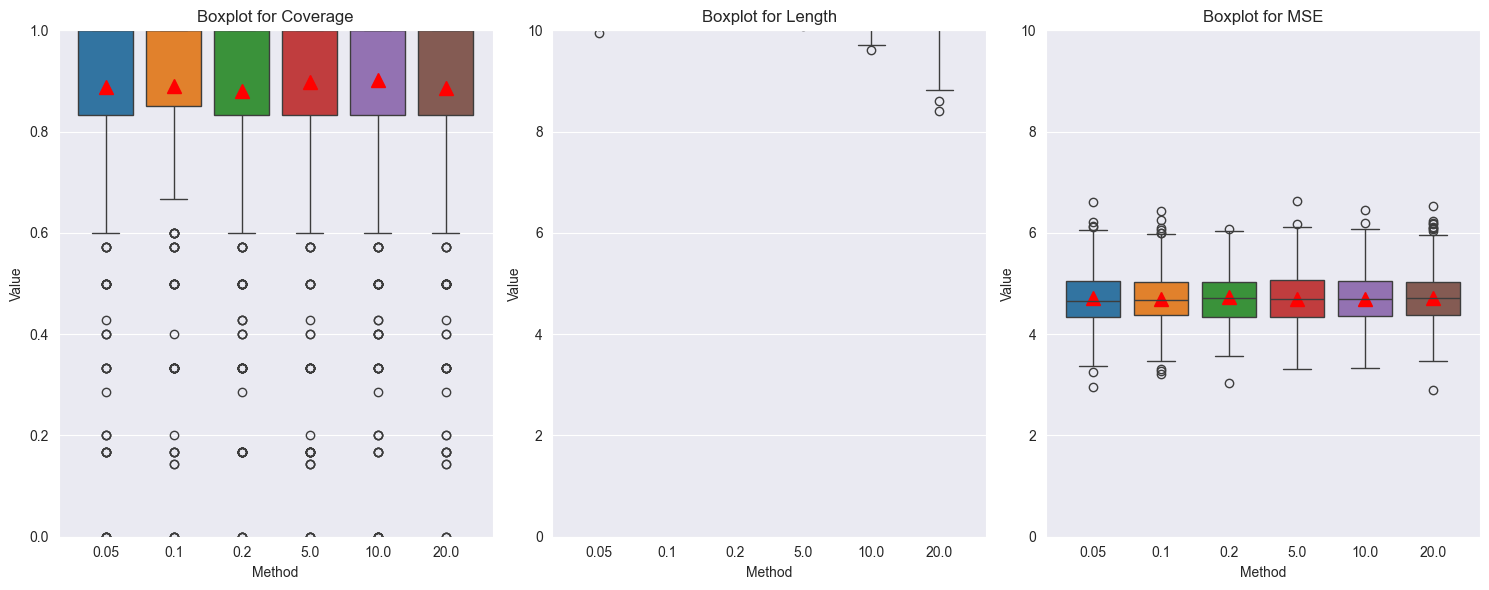

In [38]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])